<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Tutorial_Non_linear_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The first section of the tutorial will be to learn about pynamical package

# Press Ctrl + Enter to run each cell or click on the run button at the left

# Step 1 - Installing pynamical package (If not install)
!pip install pynamical
# Step 2 - Install numba package which is needed if new function is to be created (e.g. my_model)
!pip install numba
# If pynamical has already been installed comment the above line using # at the beginning

OVERVIEW OF PYNAMICAL Package


In [ ]:
# This code has been taken from reference - https://github.com/gboeing/pynamical/blob/master/examples/pynamical-quick-overview.ipynb
# Importing required module
from pynamical import logistic_map, simulate, bifurcation_plot

In [ ]:
# pops store all the simulated data for 100 iteration for each growth rates
pops = simulate(model=logistic_map, num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
# In the above code
# model : the function to be used, e.g. logistic_map. We can use our own model too.
# num_gens : number of eateration to run the model
# rate_min : minimum growth rate
# rate_max : maximum growth rate
# num_rates : Total number of rates to be taken between minimum and maximum rate
# num_discard : Number of generation discard before keeping population value
bifurcation_plot(pops)

NameError: ignored

In [ ]:
# To see help of any module e.g. simulate use the following command
?simulate # For getting only the documentation
#??simulate # For getting both documentation and code (For using this command remove # and put # in the beginning of above line)

In [ ]:
#?bifurcation_plot
??logistic_map

In [ ]:
pops # See how the variable pops looks like

/usr/local/lib/python3.6/dist-packages/pynamical/pynamical.py:381: NumbaWarning: Cannot cache compiled function "jit_simulator" as it uses outer variables in a closure
  @jit(cache=True, nopython=True) # pragma: no cover


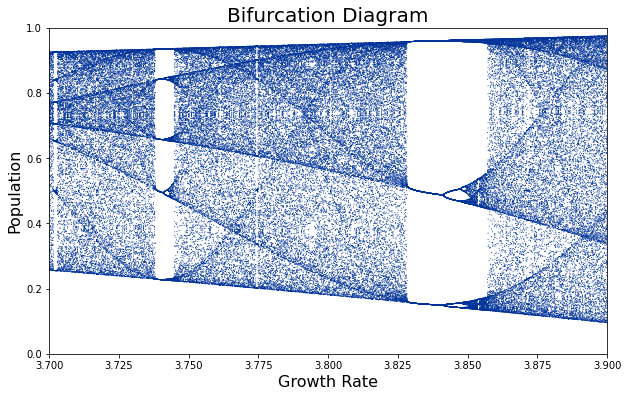

In [ ]:
# Zoom in to see the fractal structure
pops = simulate(model=logistic_map, num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9)

/usr/local/lib/python3.6/dist-packages/pynamical/pynamical.py:381: NumbaWarning: Cannot cache compiled function "jit_simulator" as it uses outer variables in a closure
  @jit(cache=True, nopython=True) # pragma: no cover


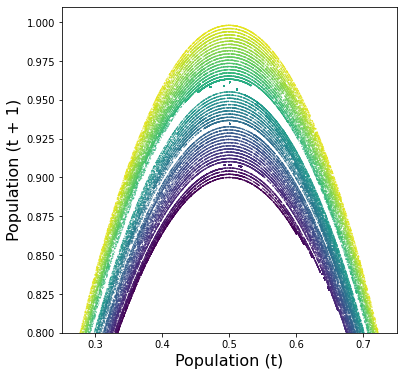

In [ ]:
# Plot a two dimensional phase diagram
from pynamical import phase_diagram
pops = simulate(model=logistic_map, num_gens=4000, rate_min=3.6, rate_max=4.0, num_rates=50, num_discard=100)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, color='viridis')

/usr/local/lib/python3.6/dist-packages/pynamical/pynamical.py:381: NumbaWarning: Cannot cache compiled function "jit_simulator" as it uses outer variables in a closure
  @jit(cache=True, nopython=True) # pragma: no cover


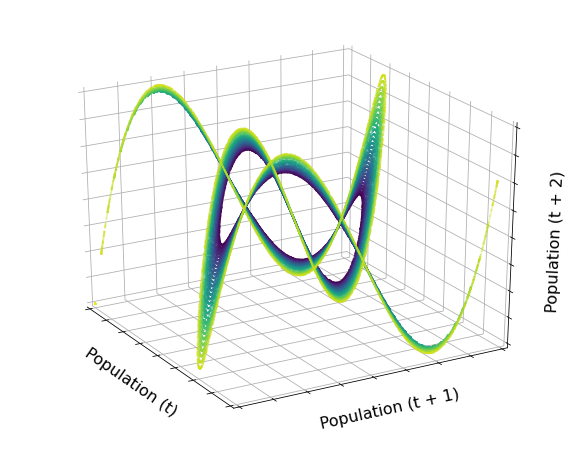

In [ ]:
# Plotting 3d phase diagram
from pynamical import cubic_map, phase_diagram_3d
pops = simulate(model=cubic_map, num_gens=3000, rate_min=3.5, num_rates=30, num_discard=100)
phase_diagram_3d(pops, xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1, alpha=0.2, color='viridis', azim=330)

In [ ]:
# Importing the animated phase diagram
import IPython.display as IPdisplay
IPdisplay.Image(url='images/phase-animate/05-logistic-3d-phase-diagram-chaotic-regime.gif')

In [ ]:
IPdisplay.Image(url='images/animated-logistic-cobweb.gif')

In [ ]:
# Creating my_model to plot the bifurcation diagram instead of using logistic_mp
# Write your model here
from numba import jit
@jit(cache = True, nopython = True) # pragma: no cover
def my_model(pop, rate):
  """
  Define the equation for my_model (F(x)=rate*(x^2-x/2)).

  Arguments
  ---------
  pop(or x) : float
      current value of x at time t
  rate : float
      value of the parameter

  Returns
  -------
  float
      scalar result of my_model at time t+1
  """
  
  return rate*pop*(1.5-pop)

/usr/local/lib/python3.6/dist-packages/pynamical/pynamical.py:381: NumbaWarning: Cannot cache compiled function "jit_simulator" as it uses outer variables in a closure
  @jit(cache=True, nopython=True) # pragma: no cover


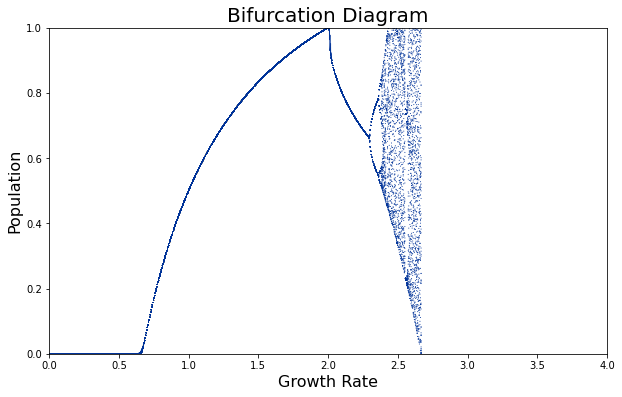

In [ ]:
# Drawing the bifurcation diagram for my_model
pops = simulate(model=my_model, num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops)